In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline

In [45]:
df=pd.read_csv('/Users/parivat/Desktop/ml_project/data/loan_approval_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df.shape

(4269, 13)

In [5]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


# **EDA**

# **Missing Values**

In [7]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

# **Seperating Columns**

In [8]:
num_cols=df.select_dtypes(include=['number'])

In [9]:
cat_cols=df.select_dtypes(include=['category'])

In [10]:
num_cols.head(4)

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000


# **Handling Skewness**

In [11]:
import seaborn as sns

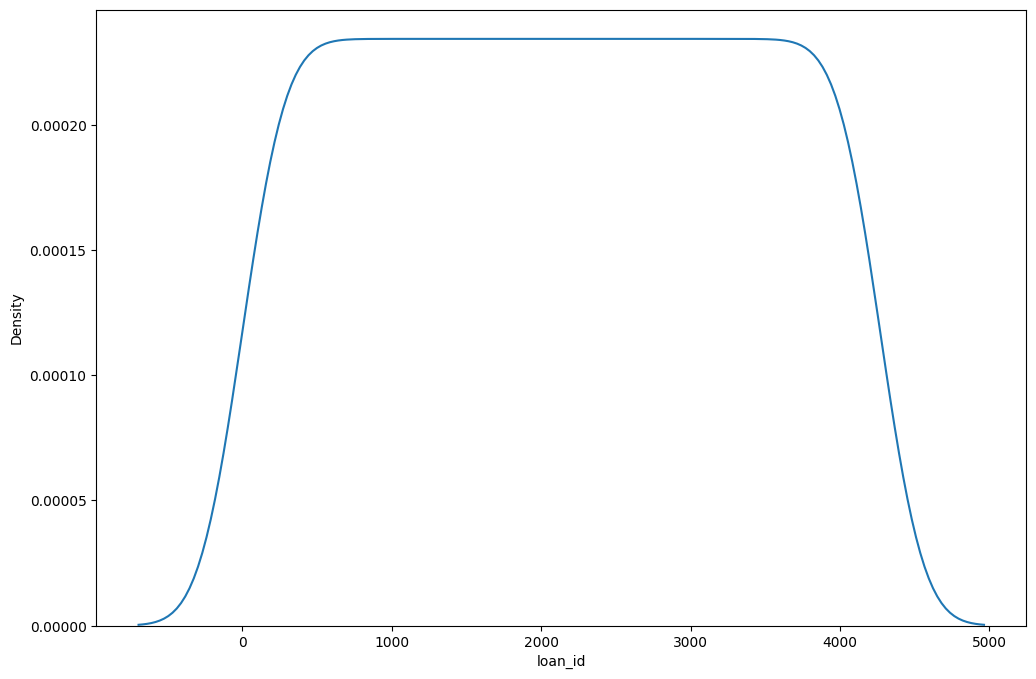

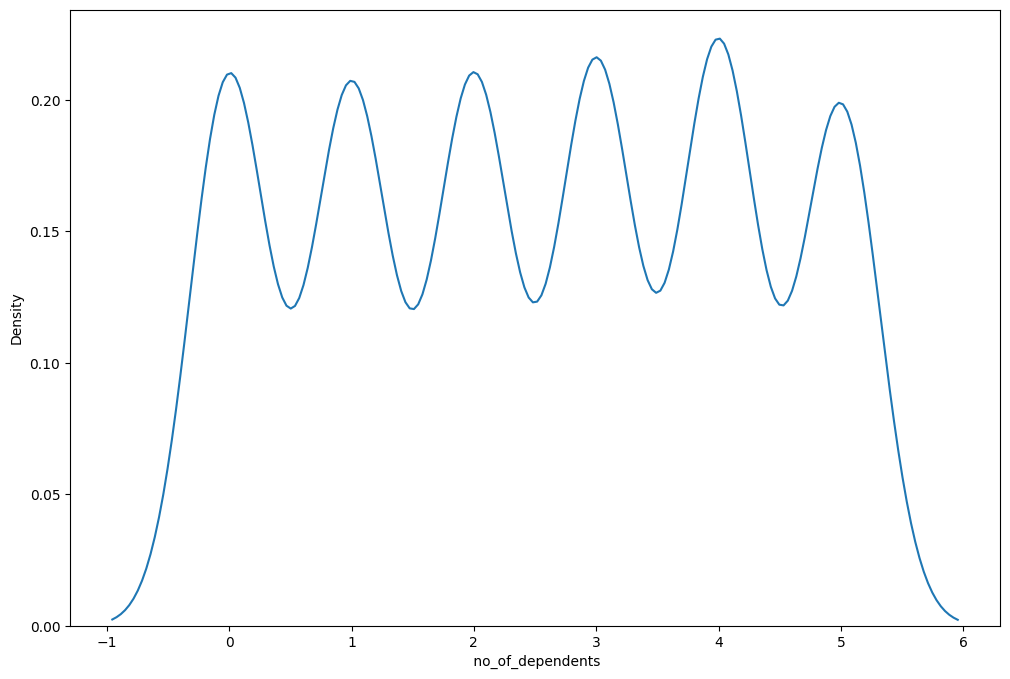

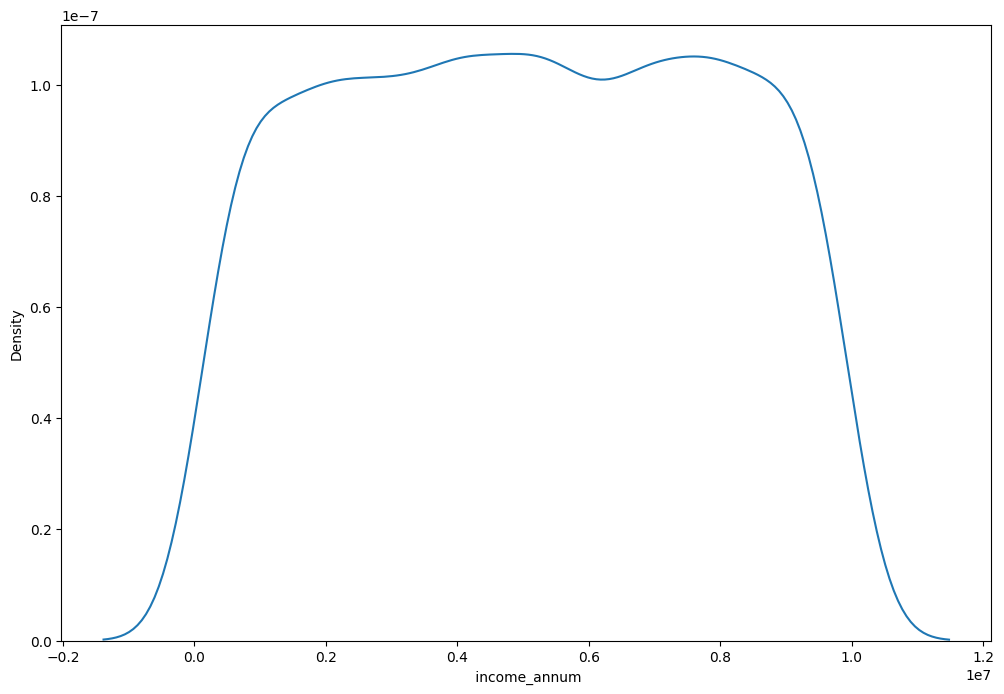

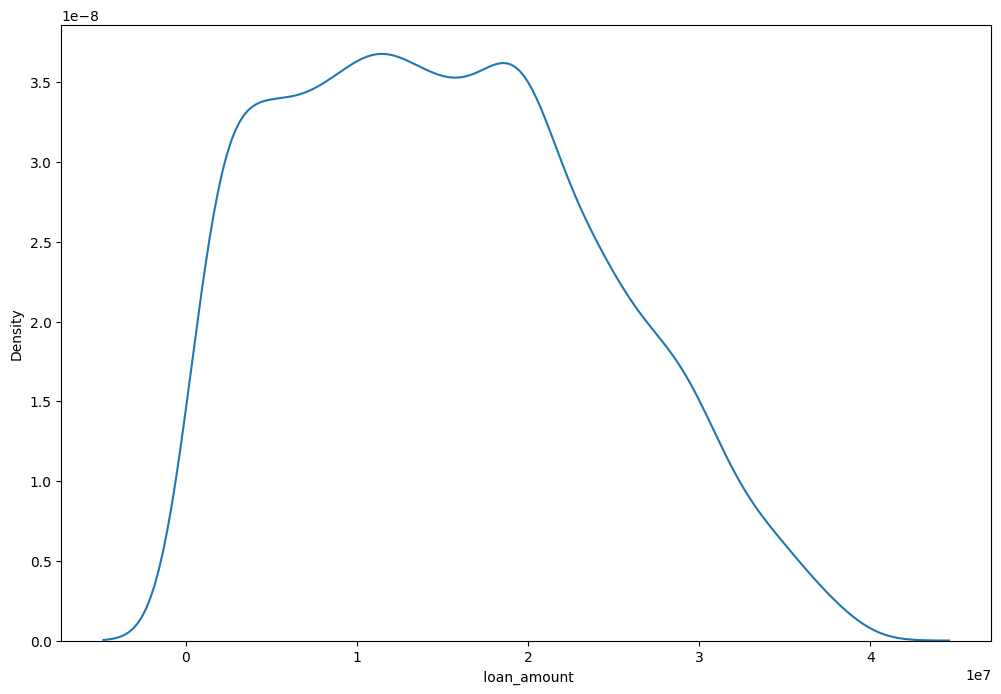

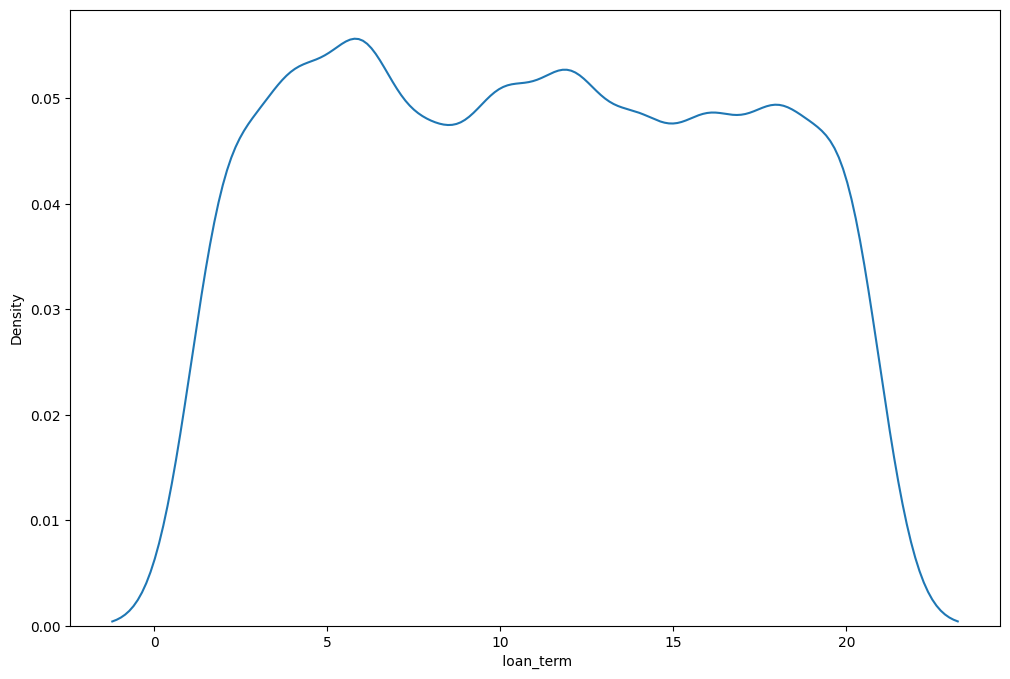

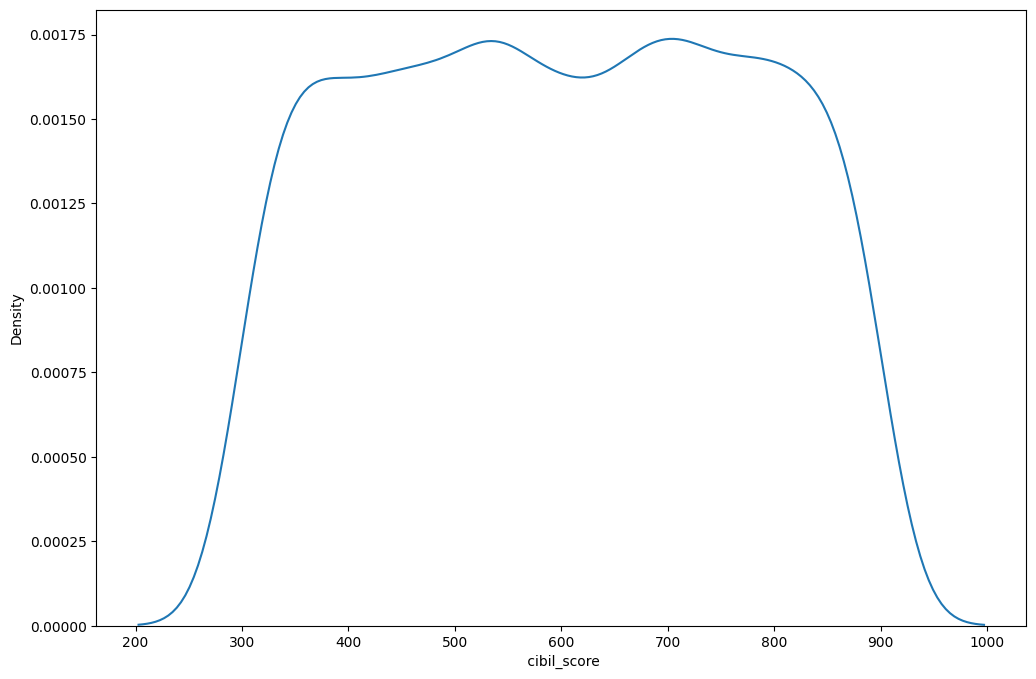

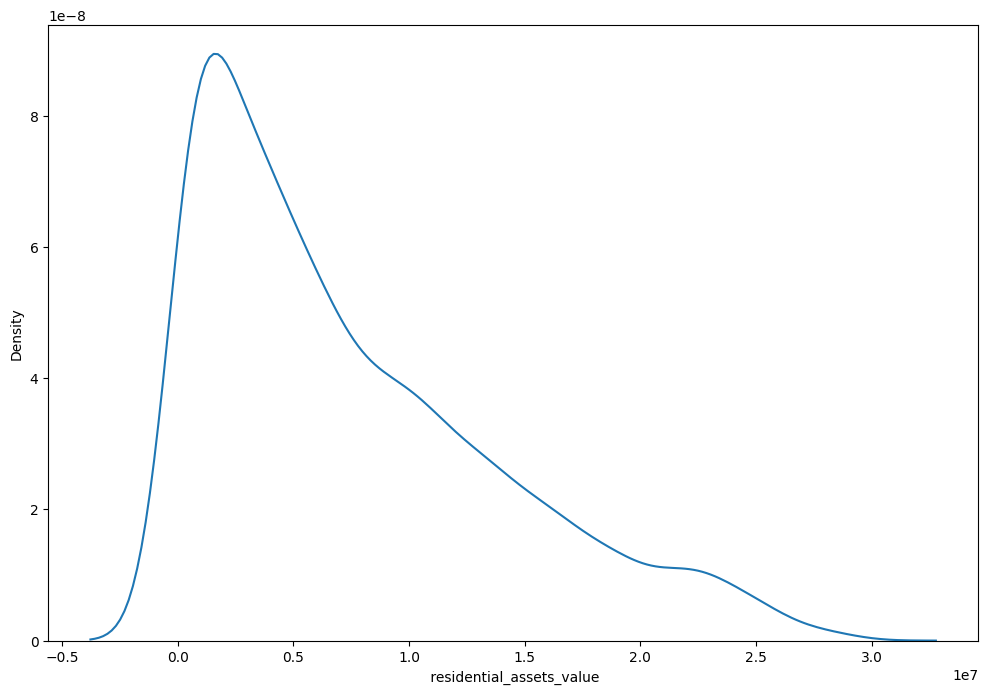

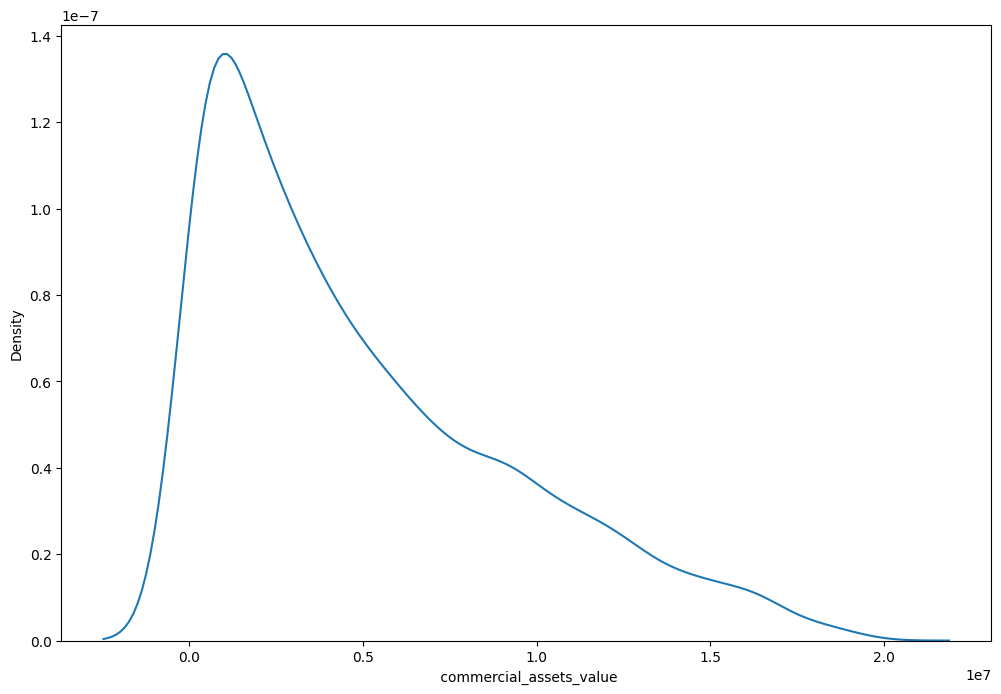

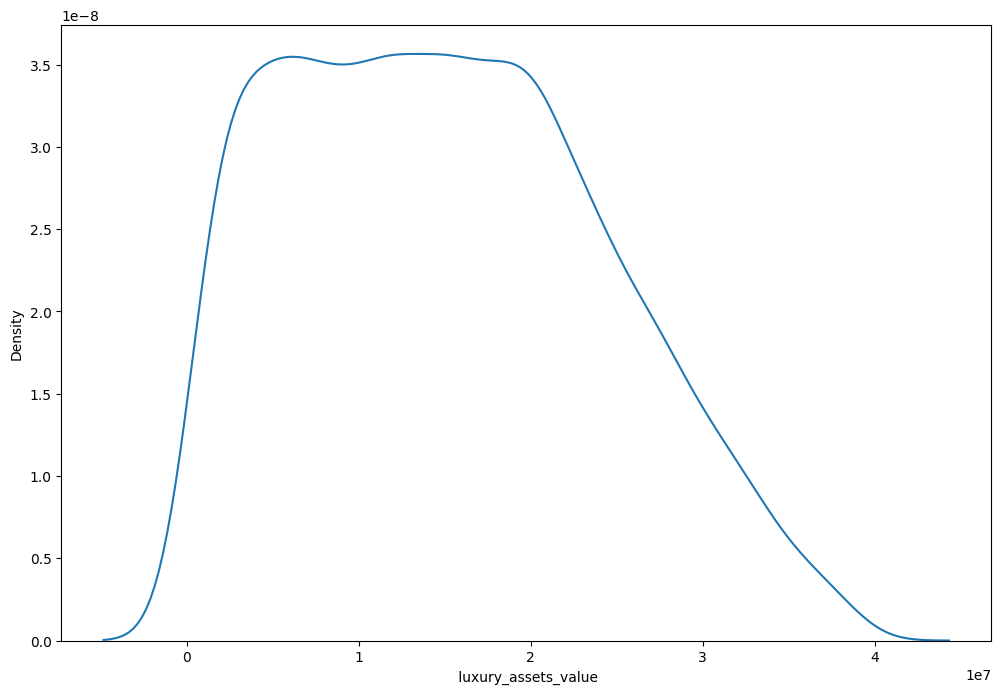

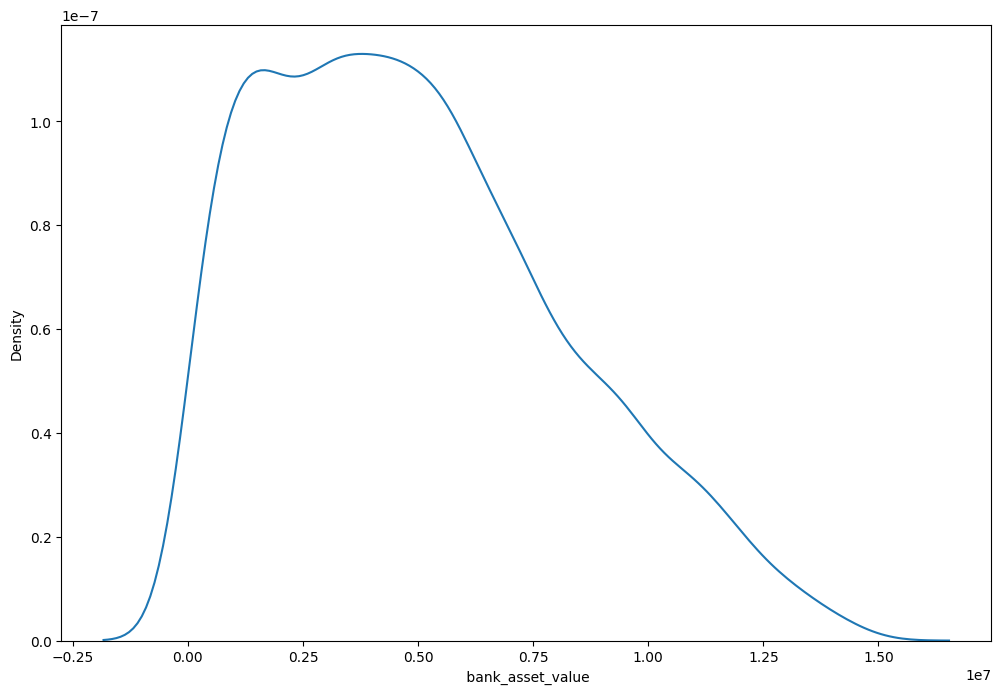

In [12]:
for i in num_cols:
  plt.figure(figsize=(12,8))
  sns.kdeplot(df[i])


In [13]:
cols=df.select_dtypes(include = ['number']).columns

In [14]:
df[cols].skew()

loan_id                      0.000000
 no_of_dependents           -0.017971
 income_annum               -0.012814
 loan_amount                 0.308724
 loan_term                   0.036359
 cibil_score                -0.009039
 residential_assets_value    0.978451
 commercial_assets_value     0.957791
 luxury_assets_value         0.322208
 bank_asset_value            0.560725
dtype: float64

In [15]:
from sklearn.preprocessing import power_transform

In [16]:
df[' residential_assets_value']=power_transform(df[[' residential_assets_value']],method='yeo-johnson')

<Axes: xlabel=' residential_assets_value', ylabel='Density'>

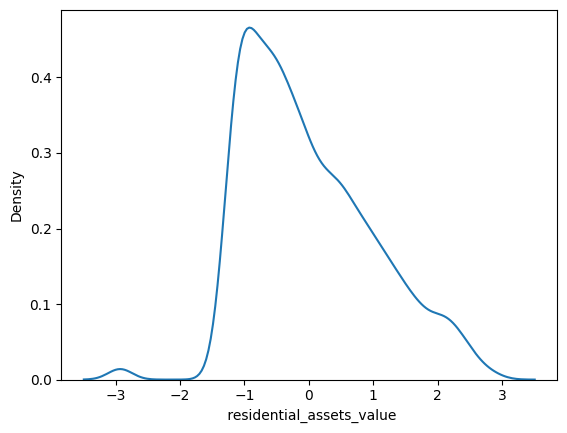

In [17]:
sns.kdeplot(df[' residential_assets_value'])

In [18]:
df[' commercial_assets_value']=power_transform(df[[' commercial_assets_value']])

<Axes: xlabel=' commercial_assets_value', ylabel='Density'>

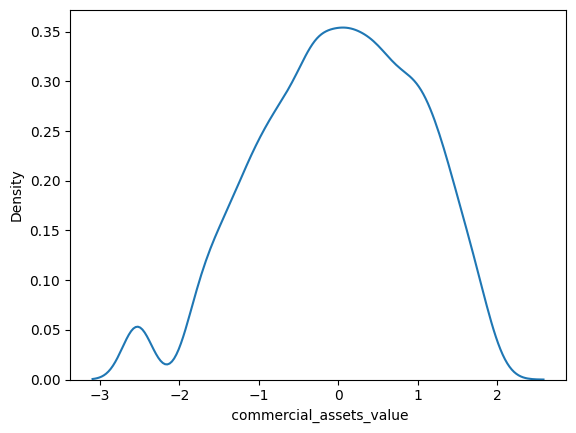

In [19]:
sns.kdeplot(df[' commercial_assets_value'])

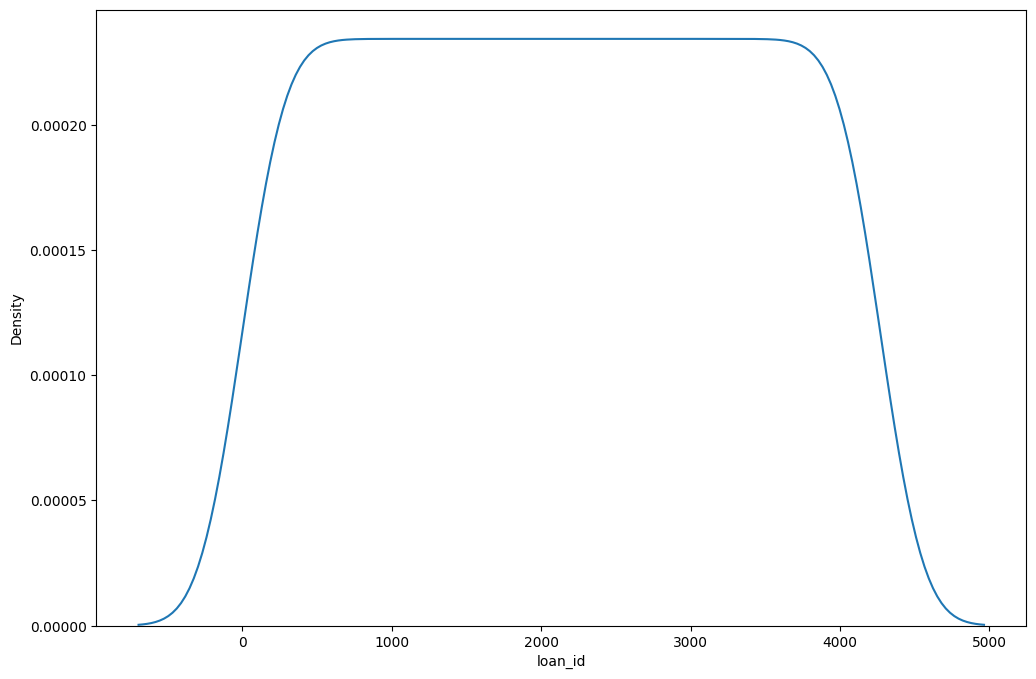

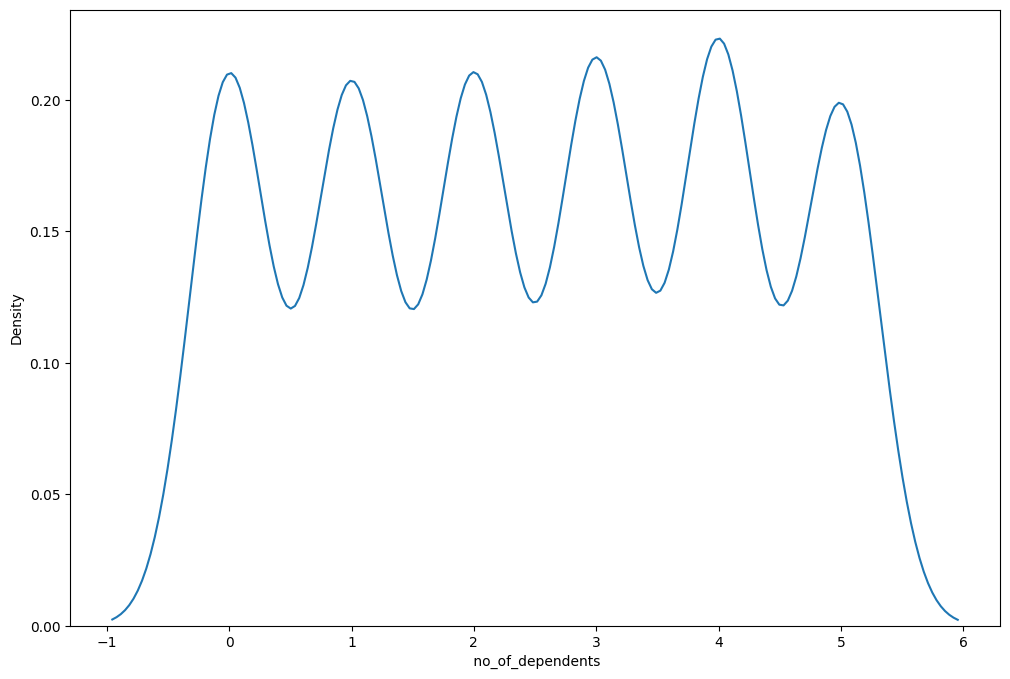

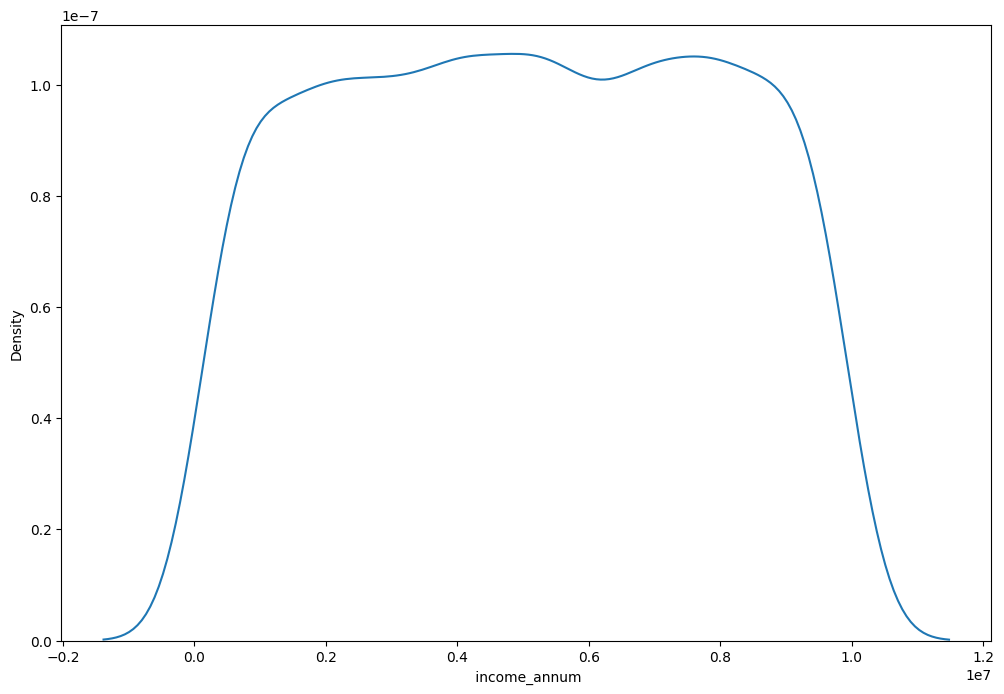

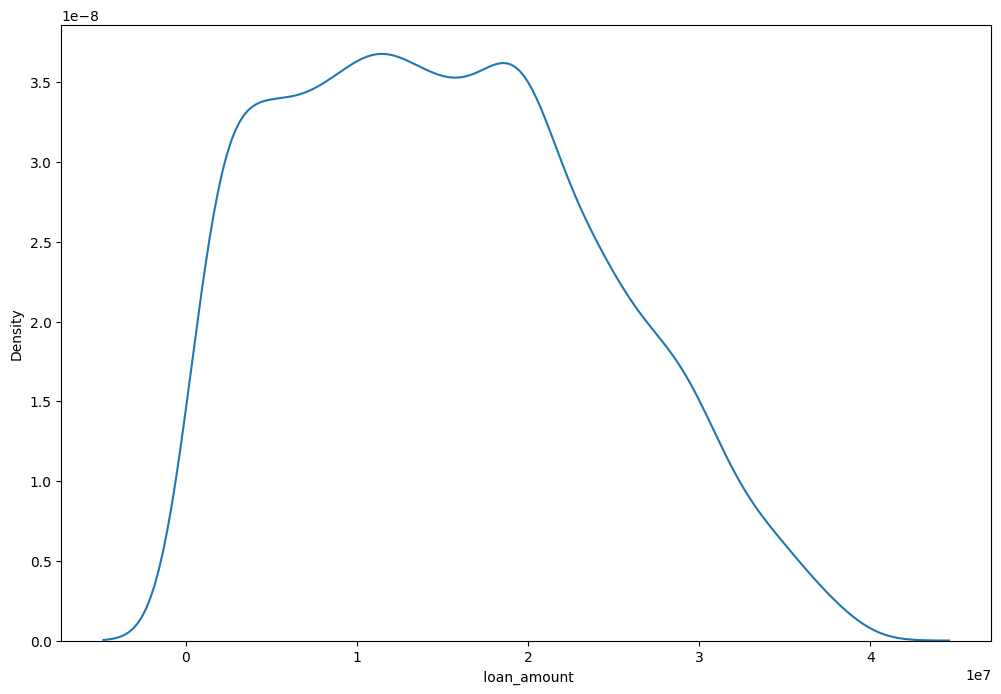

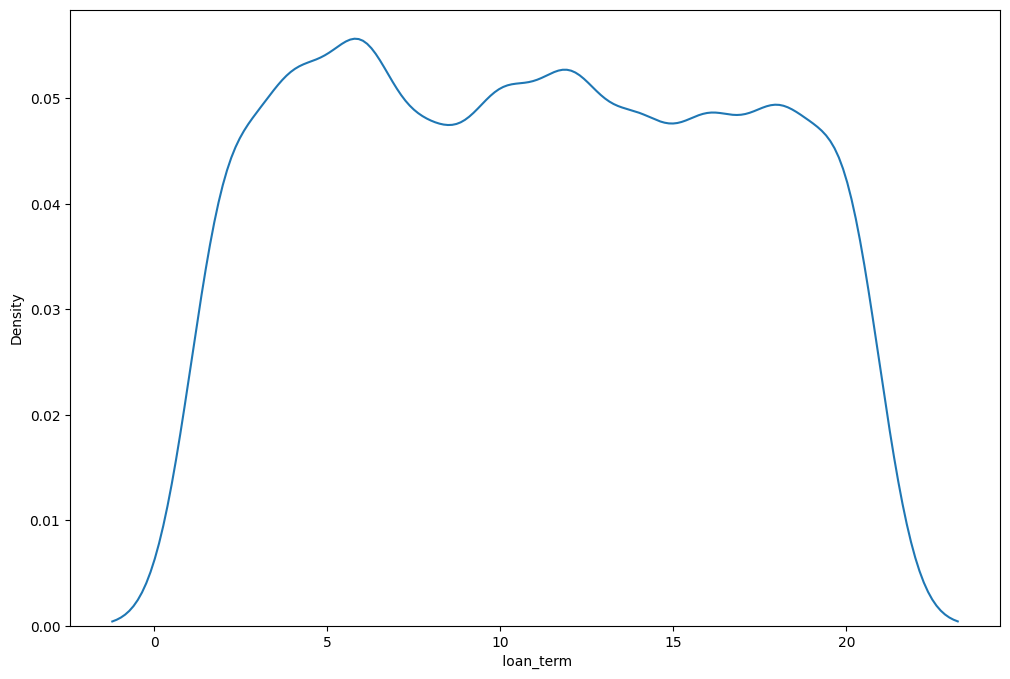

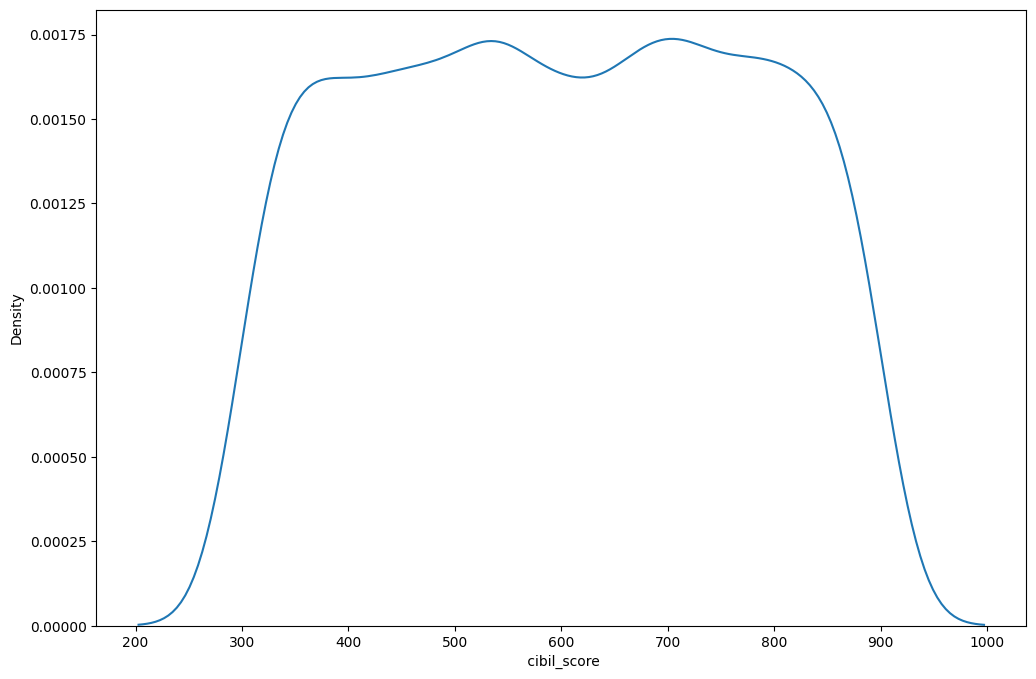

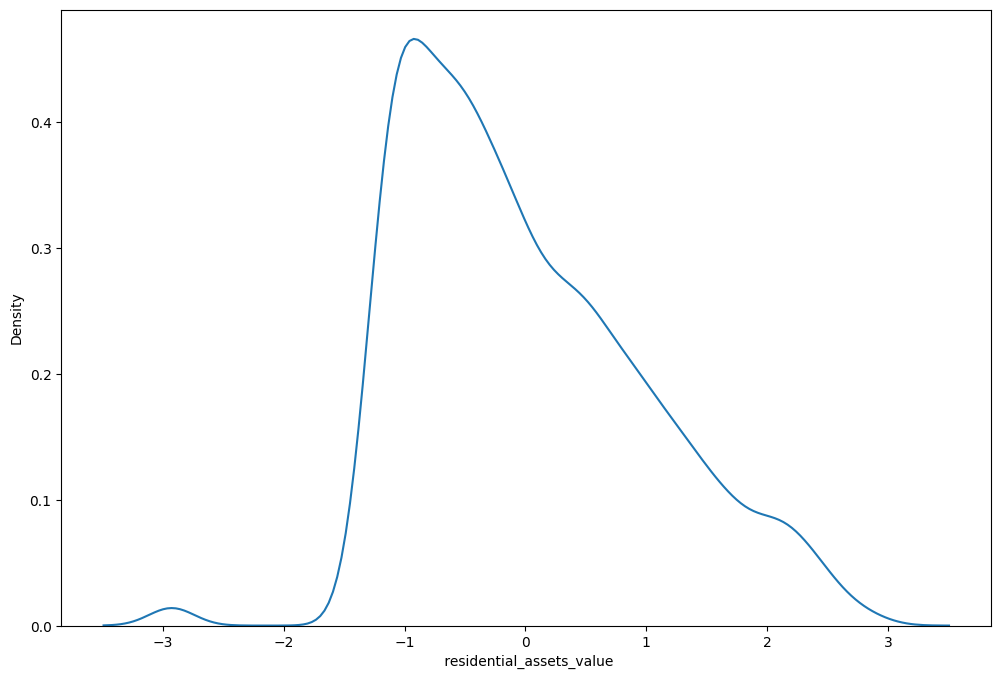

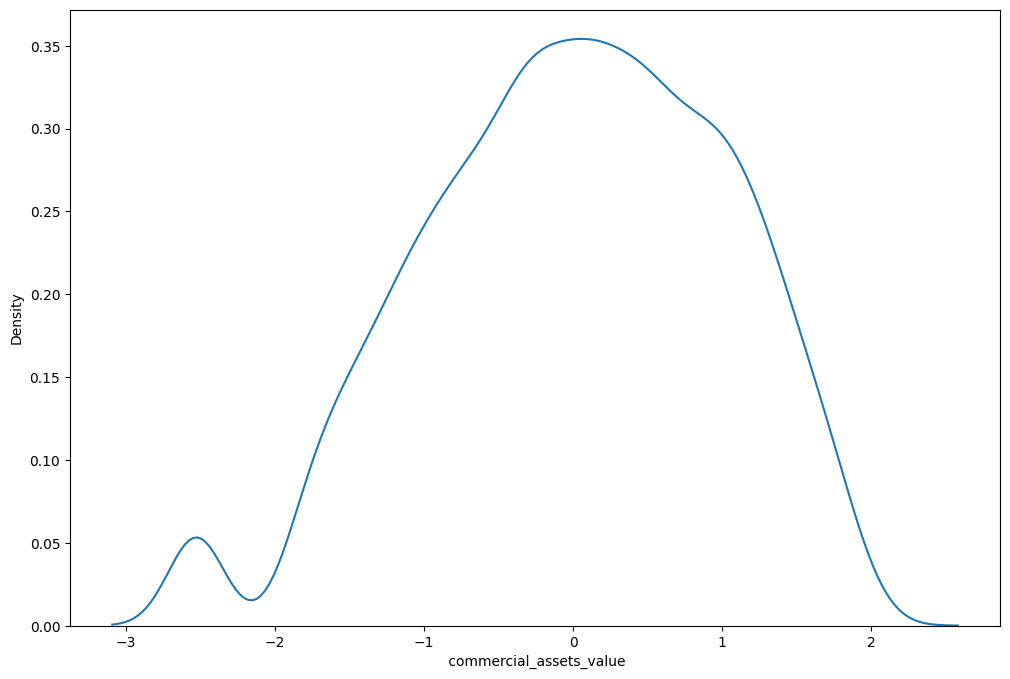

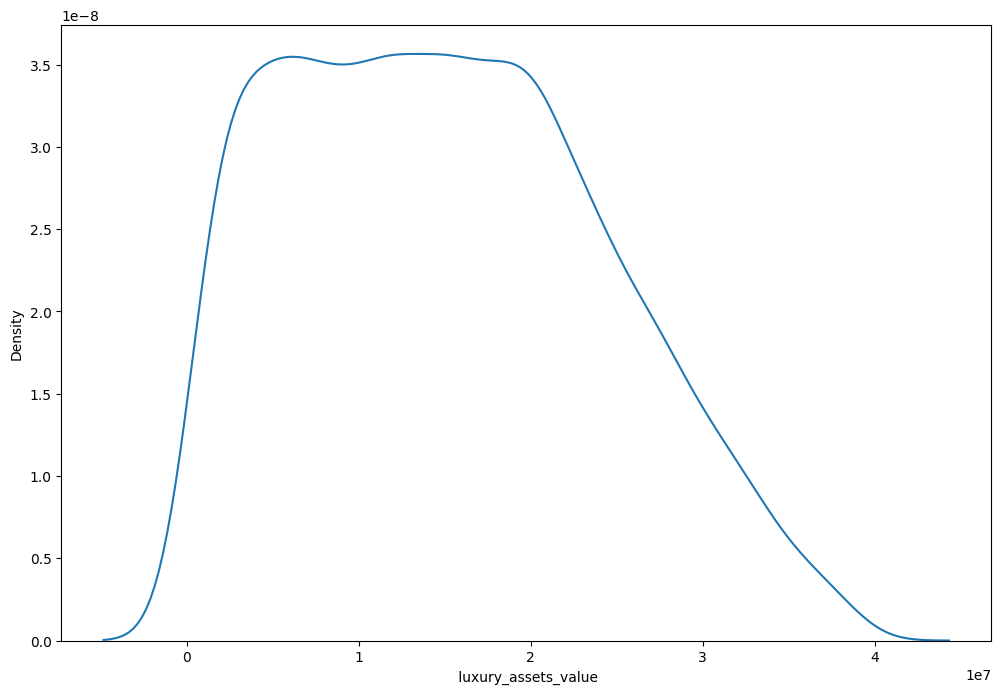

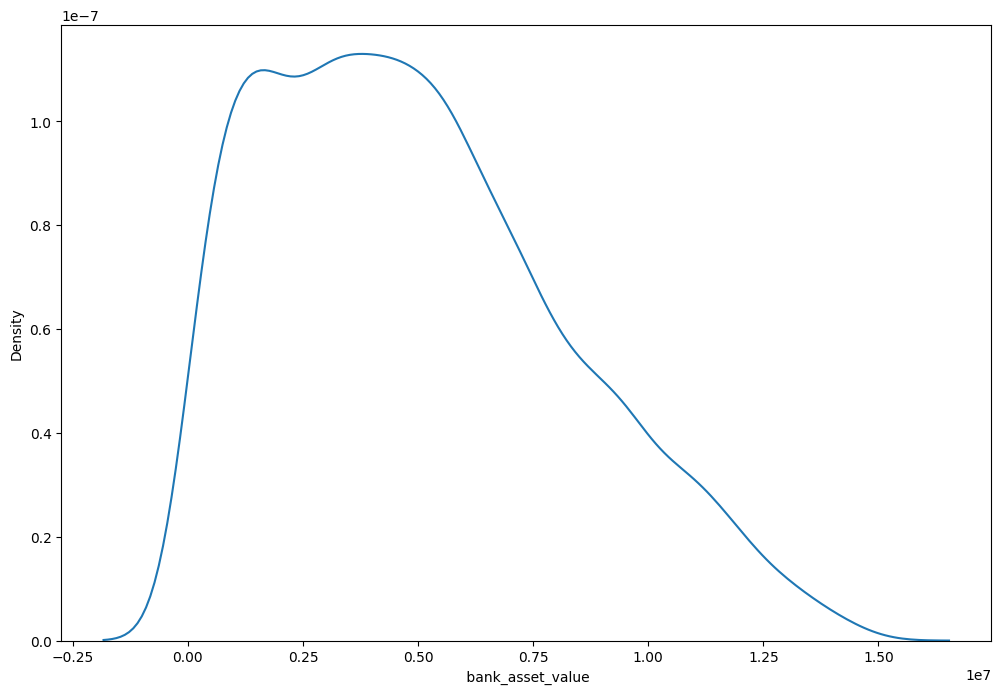

In [20]:
for i in num_cols:
  plt.figure(figsize=(12,8))
  sns.kdeplot(df[i])

# **Outliers**

In [21]:

num_df = df.select_dtypes(include='number')

outliers = {}

for col in num_df.columns:
    Q1 = num_df[col].quantile(0.25)
    Q3 = num_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers[col] = num_df[(num_df[col] < lower) | (num_df[col] > upper)][col]

# number of outlier per column...
outlier_count = {col: len(vals) for col, vals in outliers.items()}
print(outlier_count)


{'loan_id': 0, ' no_of_dependents': 0, ' income_annum': 0, ' loan_amount': 0, ' loan_term': 0, ' cibil_score': 0, ' residential_assets_value': 9, ' commercial_assets_value': 0, ' luxury_assets_value': 0, ' bank_asset_value': 5}


In [22]:
num_df = df.select_dtypes(include='number')

for col in num_df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df1 = df[(df[col] >= lower) & (df[col] <= upper)]


In [23]:
df1

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,-0.751598,1.868391,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,-0.696278,-0.372538,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,0.031896,0.227494,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,1.584531,-0.050621,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,0.804696,0.856714,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,-0.678085,-1.233600,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,-0.433678,-0.158079,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,-0.987860,1.371730,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,0.198912,-1.074353,14100000,5800000,Approved


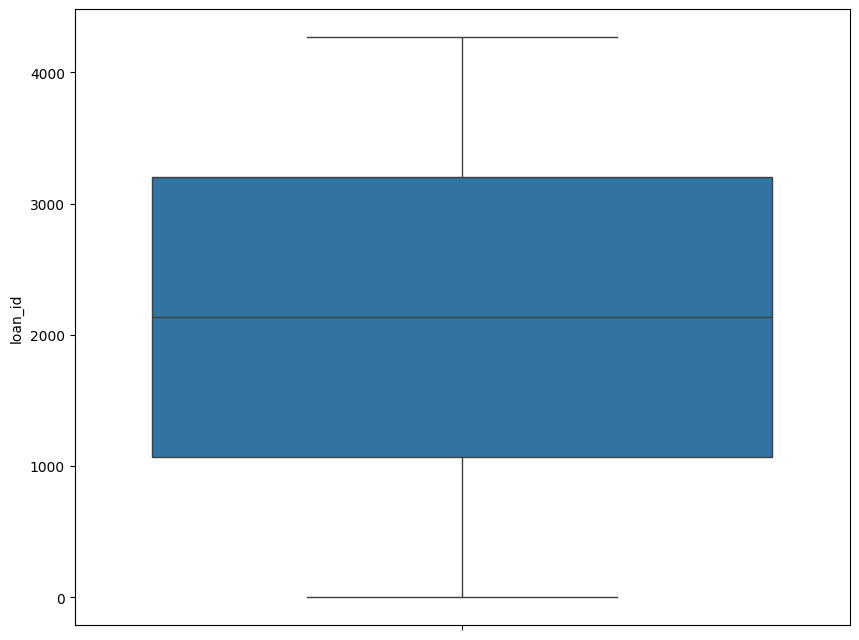

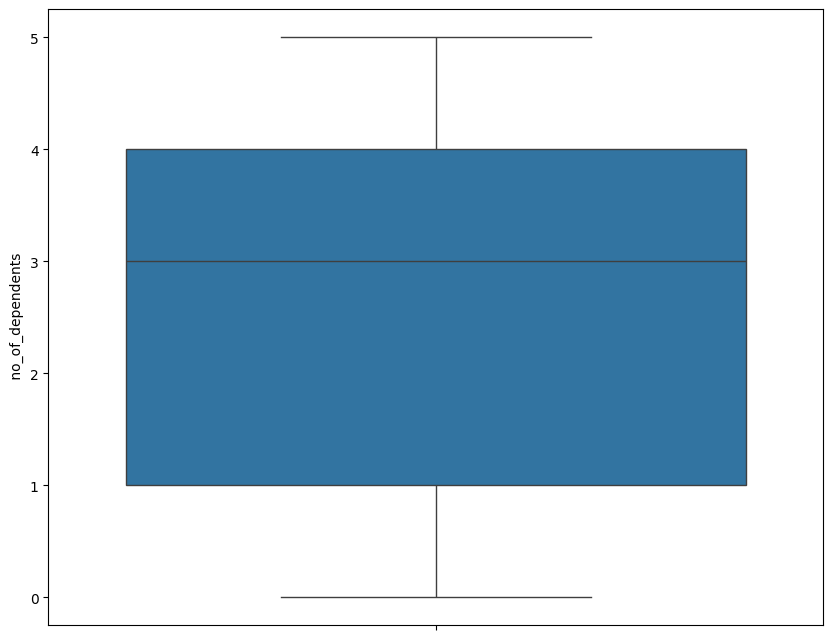

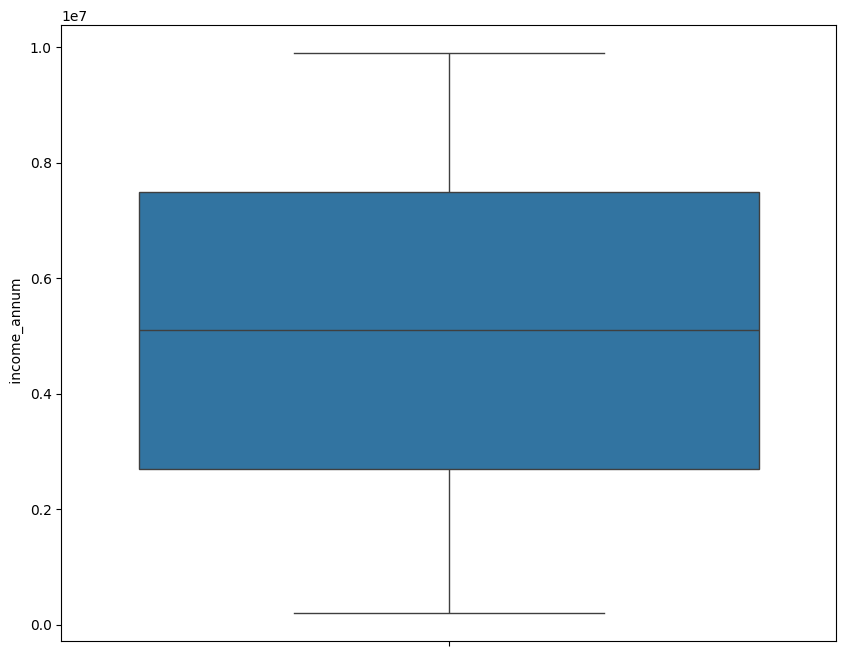

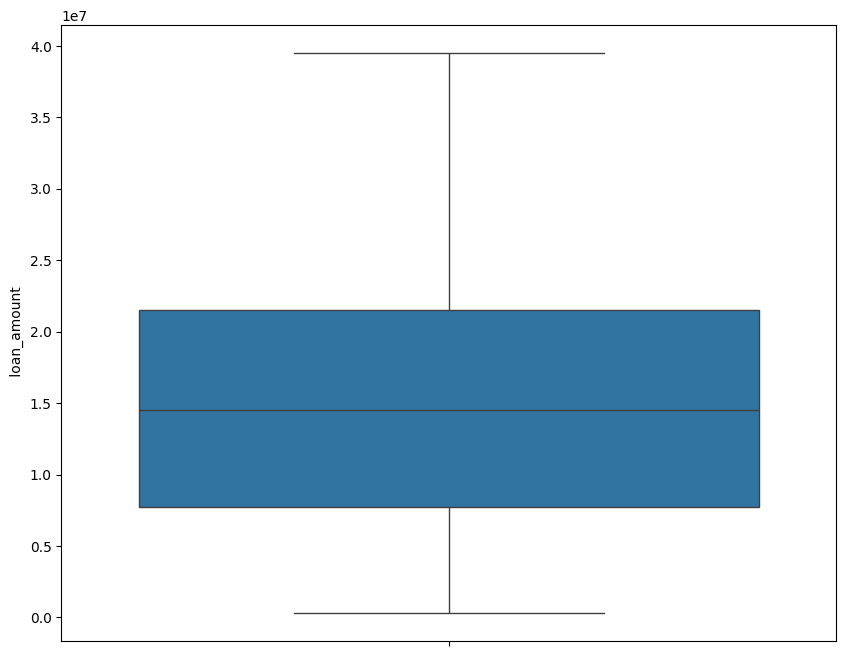

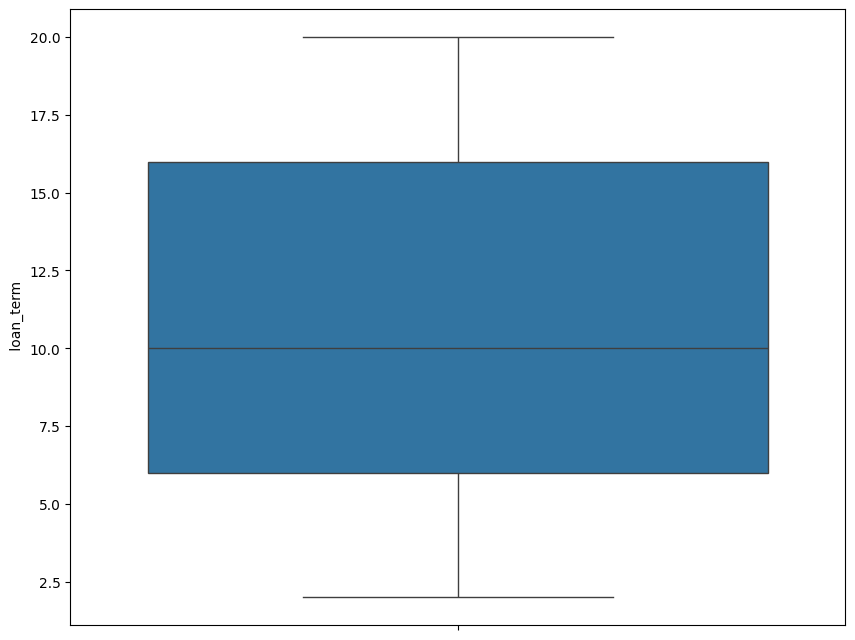

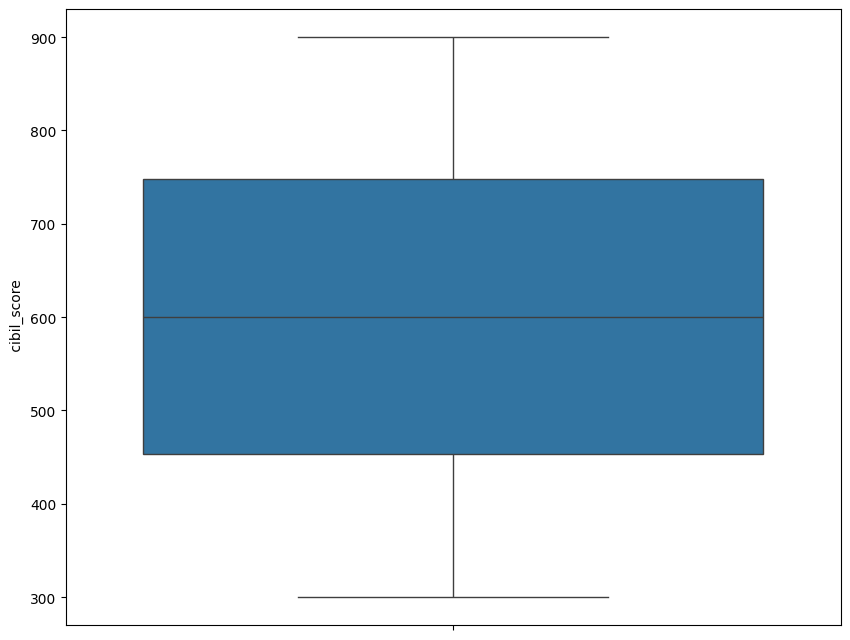

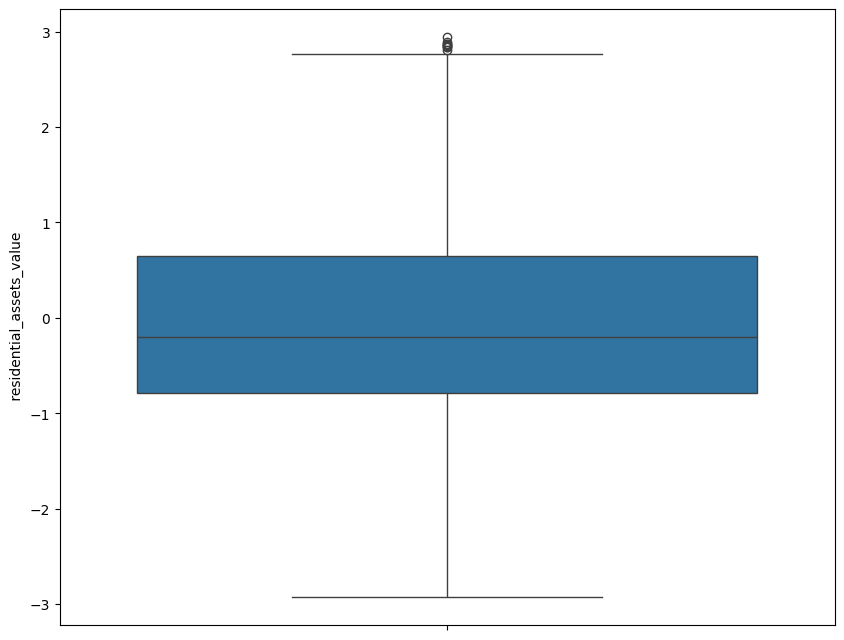

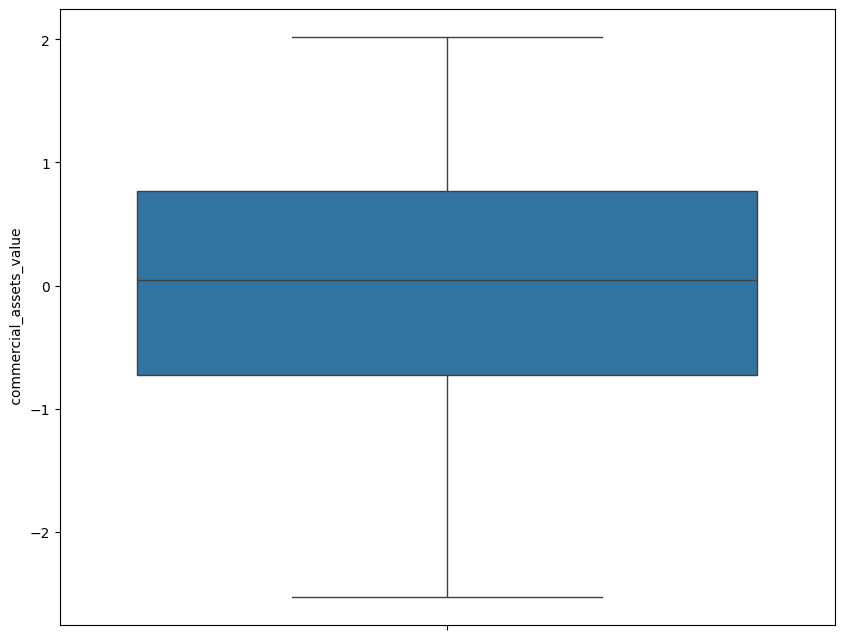

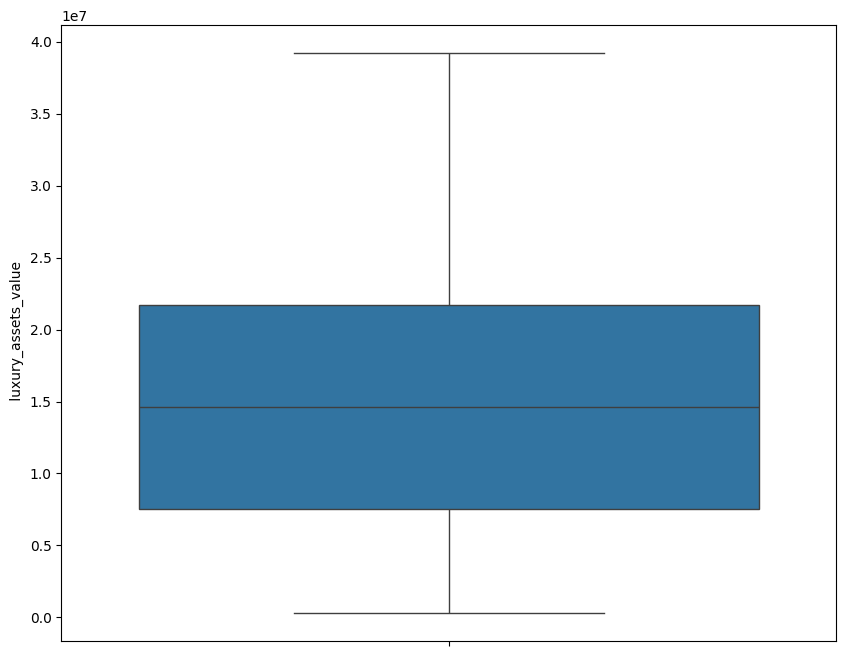

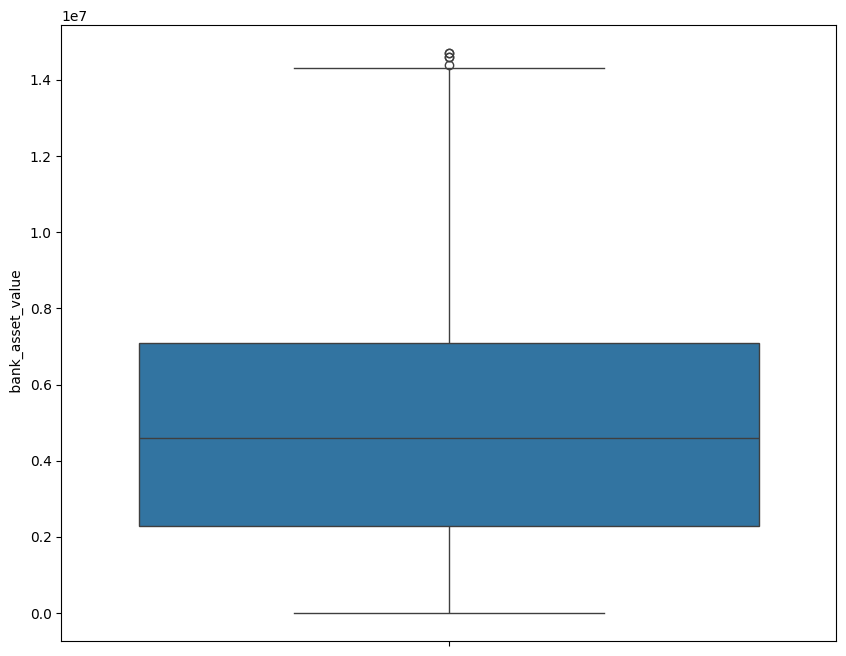

In [24]:
for i in df1.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(10,8))
  sns.boxplot(df[i])

# **Coorelation**

In [25]:
corr=df1.select_dtypes(include=['number']).corr()


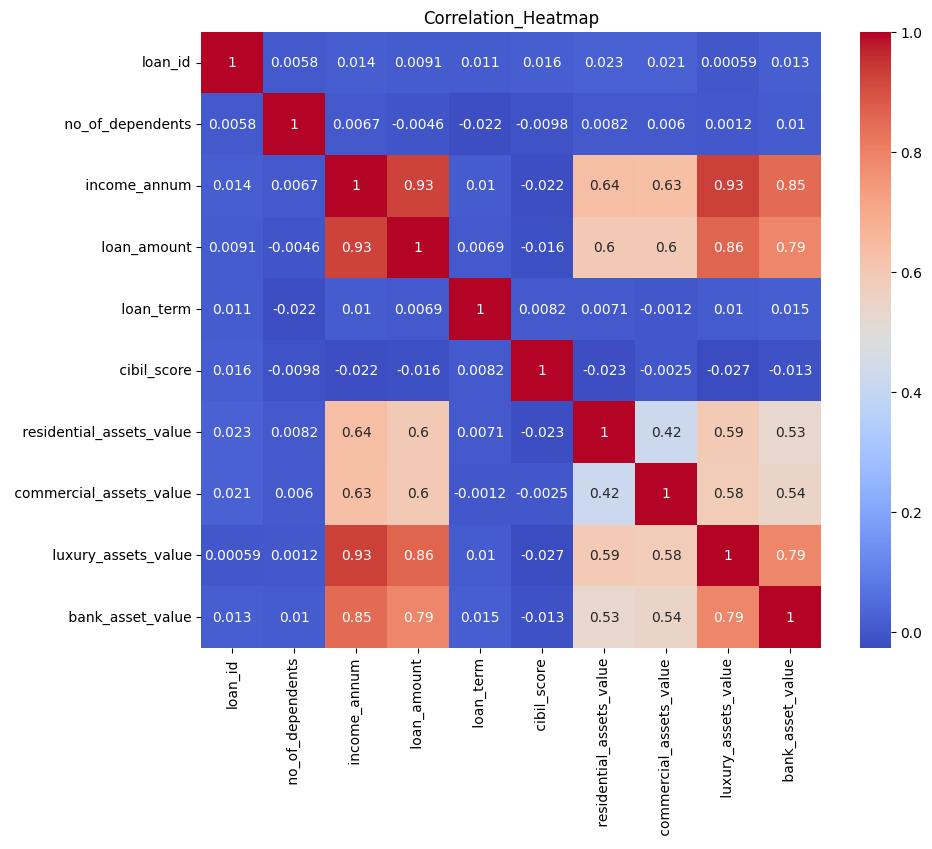

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation_Heatmap')
plt.show()

In [27]:
df1.head(3)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,-0.751598,1.868391,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,-0.696278,-0.372538,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,0.031896,0.227494,33300000,12800000,Rejected


In [28]:
x=df.drop(columns=[' loan_status','loan_id'])
y=df[' loan_status']

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=42)

In [30]:
sc_num=x_train.select_dtypes(include=['number']).columns

In [31]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [32]:
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(
  transformers=[
      ('cat',OneHotEncoder(sparse_output=False,drop='first'),[' education',' self_employed']),
      ('num',StandardScaler(),sc_num)
  ]
  ,remainder='passthrough'
)

In [33]:
x_train_trf=ct.fit_transform(x_train)

In [34]:
x_test_trf=ct.transform(x_test)

In [35]:
x_train_final=pd.DataFrame(x_train_trf,columns=x_train.columns)

In [36]:
x_test_final=pd.DataFrame(x_test_trf,columns=x_test.columns)

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train_encoded=le.fit_transform(y_train)
y_test_encoded=le.transform(y_test)

In [38]:
y_train_encoded

array([0, 1, 0, ..., 1, 1, 0])

Algorithms

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train_final,y_train_encoded)
y_pred=rf.predict(x_test_final)

Accuracy_score

In [40]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test_encoded,y_pred)*100
score

97.07259953161592

Hyperparameter->Optuna

In [41]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 2, 50),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical(
            "max_features", ["sqrt", "log2", None]
        ),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "random_state": 42,
        "n_jobs": -1,
    }

    model = RandomForestClassifier(**params)
    model.fit(x_train_final, y_train_encoded)

    y_pred = model.predict(x_test_final)
    acc = accuracy_score(y_test_encoded, y_pred)

    return acc*100


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best Accuracy:", study.best_value)
print("Best Params:", study.best_params)

    

/Users/parivat/micromamba/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2026-01-26 14:42:45,023] A new study created in memory with name: no-name-213ac258-cafd-48b3-a5c5-ce2a5df72731
[I 2026-01-26 14:42:45,564] Trial 0 finished with value: 96.91647150663543 and parameters: {'n_estimators': 385, 'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 96.91647150663543.
[I 2026-01-26 14:42:45,748] Trial 1 finished with value: 96.40905542544887 and parameters: {'n_estimators': 158, 'max_depth': 5, 'min_samples_split': 17, 'min_samples_leaf': 14, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 96.91647150663543.
[I 2026-01-26 14:42:45,941] Trial 2 finished with value: 97.34582357533176 and parameters

Best Accuracy: 97.61904761904762
Best Params: {'n_estimators': 205, 'max_depth': 21, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_features': None, 'bootstrap': False}


Classification_Report

In [42]:
from sklearn.metrics import classification_report
report=classification_report(y_test_encoded,y_pred,output_dict=True)
report
table=pd.DataFrame(report).T
table

,precision,recall,f1-score,support
0,0.972836,0.979644,0.976228,1572.000000
1,0.967314,0.956566,0.961910,990.000000
accuracy,0.970726,0.970726,0.970726,0.970726
macro avg,0.970075,0.968105,0.969069,2562.000000
weighted avg,0.970702,0.970726,0.970695,2562.000000


ROC-AUC CURVE

In [43]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = auc(fpr, tpr)

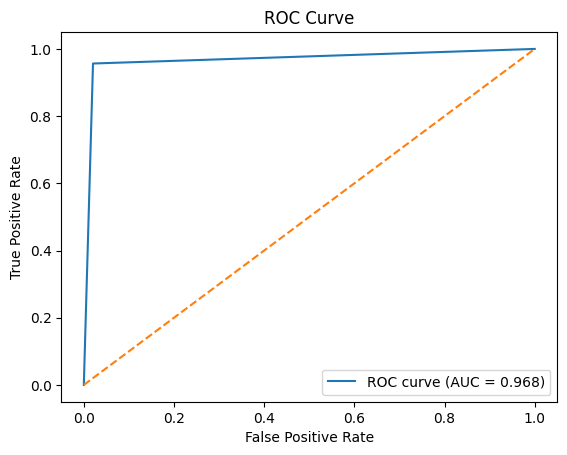

In [44]:
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig('auc_curve.png')
plt.show()
